<a href="https://colab.research.google.com/github/Nimrat4/NLP-sentence-generation-unigrams-and-bigrams-/blob/main/NLP1_sentence_generation_unigrams_bigrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.5 MB/s eta 0:00:00


In [ ]:
import re
import nltk
import docx
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
nltk.download('punkt')
from nltk.tokenize import word_tokenize


filename = "/content/AI_NLP (1).docx"
doc = docx.Document(filename)
manual_text = '\n'.join([paragraph.text for paragraph in doc.paragraphs])

# Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    return tokens


tokens = preprocess_text(manual_text)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
word_counts = Counter(tokens)
total_words = len(tokens)

# Compute PMF
pmf = {word: count / total_words for word, count in word_counts.items()}

# sample PMF values
print("\nSample PMF values:")
for word, prob in list(pmf.items())[:10]:
    print(f"{word}: {prob:.6f}")



Sample PMF values:
artificial: 0.002870
intelligence: 0.003827
ai: 0.010523
in: 0.018814
its: 0.002870
broadest: 0.000319
sense: 0.000638
is: 0.016901
exhibited: 0.000319
by: 0.009566


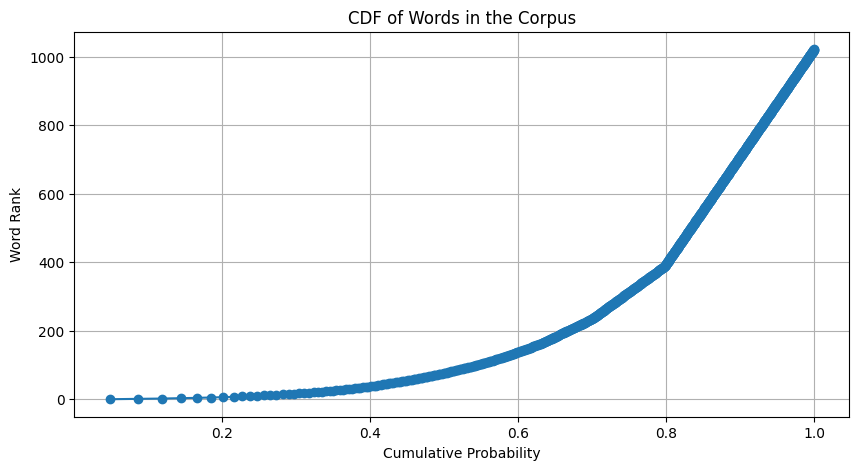

In [ ]:
# Sort words- probability
sorted_words = sorted(pmf.items(), key=lambda x: x[1], reverse=True)

# Compute CDF
cdf = {}
cumulative_prob = 0
for word, prob in sorted_words:
    cumulative_prob += prob
    cdf[word] = cumulative_prob

# Plot CDF
plt.figure(figsize=(10, 5))
plt.plot(list(cdf.values()), list(range(len(cdf))), marker='o', linestyle='-')
plt.xlabel("Cumulative Probability")
plt.ylabel("Word Rank")
plt.title("CDF of Words in the Corpus")
plt.grid()
plt.show()


In [ ]:

def sample_word(cdf):
    r = random.uniform(0, 1)  # 0-1 random
    for word, prob in cdf.items():
        if r <= prob:
            return word
    return None


In [ ]:
# Generate sentence
def generate_sentence(start_word, length=15):
    sentence = [start_word]
    for _ in range(length - 1):
        next_word = sample_word(cdf)
        sentence.append(next_word)
    return ' '.join(sentence)


start_word = random.choice(tokens)
generated_sentence = generate_sentence(start_word)

print("\nGenerated Sentence:")
print(generated_sentence)



Generated Sentence:
test but rational logic in inverse of or or include interpret inference in processing traits


In [ ]:
from collections import defaultdict

# Generate bigrams
bigrams = list(nltk.bigrams(tokens))

# Count bigram occurrences
bigram_counts = Counter(bigrams)
total_bigrams = sum(bigram_counts.values())

# Compute bigram PMF (P(next_word | prev_word))
bigram_pmf = defaultdict(dict)
for (w1, w2), count in bigram_counts.items():
    # Calculate total count of bigrams starting with w1 using bigram_counts
    total_count_w1 = sum(bigram_counts[(w1, w)] for w in word_counts)  # Iterate over all words in vocabulary
    # Handle potential ZeroDivisionError if total_count_w1 is 0
    bigram_pmf[w1][w2] = count / total_count_w1 if total_count_w1 else 0

# Display sample bigram probabilities
print("\nSample Bigram PMF values:")
sample_word = random.choice(tokens)
if sample_word in bigram_pmf:
    for next_word, prob in list(bigram_pmf[sample_word].items())[:5]:
        print(f"P({next_word} | {sample_word}) = {prob:.6f}")



Sample Bigram PMF values:
P(roboticsa | for) = 0.037037
P(dealing | for) = 0.037037
P(solving | for) = 0.037037
P(ai | for) = 0.037037
P(each | for) = 0.074074


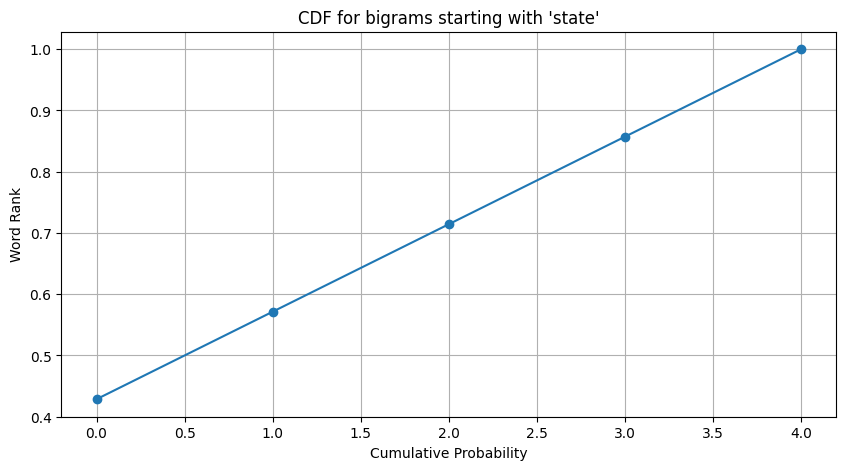

In [ ]:
# Compute bigram CDF
bigram_cdf = defaultdict(dict)
for w1, next_words in bigram_pmf.items():
    cumulative_prob = 0
    for w2, prob in sorted(next_words.items(), key=lambda x: x[1], reverse=True):
        cumulative_prob += prob
        bigram_cdf[w1][w2] = cumulative_prob

# Plot CDF for a sample word
sample_word = random.choice(tokens)
if sample_word in bigram_cdf:
    plt.figure(figsize=(10, 5))
    plt.plot(list(bigram_cdf[sample_word].values()), marker='o', linestyle='-')
    plt.xlabel("Cumulative Probability")
    plt.ylabel("Word Rank")
    plt.title(f"CDF for bigrams starting with '{sample_word}'")
    plt.grid()
    plt.show()


In [ ]:
# Function to sample next word based on bigram CDF
def sample_bigram(prev_word):
    if prev_word not in bigram_cdf:
        return random.choice(tokens)  # If word has no bigram pairs, choose random word

    r = random.uniform(0, 1)
    for next_word, prob in bigram_cdf[prev_word].items():
        if r <= prob:
            return next_word
    return None  # Should never happen


In [ ]:
# Generate a sentence using bigrams
def generate_bigram_sentence(start_word, length=15):
    sentence = [start_word]
    for _ in range(length - 1):
        next_word = sample_bigram(sentence[-1])
        sentence.append(next_word)
    return ' '.join(sentence)

# Choose a random starting word
start_word = random.choice(tokens)
generated_bigram_sentence = generate_bigram_sentence(start_word)

print("\nGenerated Bigram Sentence:")
print(generated_bigram_sentence)



Generated Bigram Sentence:
outcome will change the emergence of existing computer systems it can identify an interconnected group
